# 4.10 Instacart Final Analysis

### Table of Contents

01. Crosstabs

02. PII issues

03. Assigning Flags


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing customers_orders_products.pkl dataframe
path = r'C:\Users\31622\OneDrive\Documents\Career Foundry\Career Foundry\Exercise\Exercise 4\Instacart Basket Analysis'
customers_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_ords_prods.pkl'))

**Question 2: Consider any security implications that might exist for this new data**

In [3]:
customers_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   number_of_orders        int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  mean_price              float64 
 21  Spendi

In [4]:
# create cross reference between days since prior order and number of orders to check that this corresponds to the number of orders 0 for first time customers.  
crosstab = pd.crosstab(customers_ords_prods['days_since_prior_order'], customers_ords_prods['number_of_orders'], dropna = False)

In [5]:
# copy to clipboard
crosstab.to_clipboard()

**Observation: Looking at the data frame, we see that the first and last name contains data that can easily identify individuals. This column can be dropped to ensure data privacy of these persons.**

In [6]:
# Drop the columns that contain personal information
df_clean = customers_ords_prods.drop(columns=['First Name', 'Last_name'])

In [7]:
df_clean.columns

Index(['order_id', 'user_id', 'number_of_orders', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'Spending_flag', 'median_days', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'Num_of_dependants',
       'Marital_status', 'income'],
      dtype='object')

**Question 3: Create a regional segmentation of the data by creating Regions based on States**

In [8]:
# Create flags to assign "region" labels to users based on 'states'
df_clean.loc[df_clean['STATE'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'

In [9]:
df_clean.loc[df_clean['STATE'].isin(['Wisconsin' , 'Michigan' , 'Illinois' , 'Indiana' , 'Ohio' , 'North Dakota' , 'South Dakota' , 'Nebraska' , 'Kansas' , 'Minnesota' , 'Iowa' , 'Missouri']
) , 'Region'] = 'Midwest' 

In [10]:
df_clean.loc[df_clean['STATE'].isin(['Delaware' , 'Maryland' , 'District of Columbia' , 'Virginia' , 'West Virginia' , 'North Carolina' , 'South Carolina' , 'Georgia' , 'Florida' , 'Kentucky' , 'Tennessee' , 'Mississippi' , 'Alabama' , 'Oklahoma' , 'Texas' , 'Arkansas' , 'Louisiana']
) , 'Region'] = 'South' 

In [11]:
df_clean.loc[df_clean['STATE'].isin(['Idaho' , 'Montana' , 'Wyoming' , 'Nevada' , 'Utah' , 'Colorado' , 'Arizona' , 'New Mexico' , 'Alaska' , 'Washington' , 'Oregon' , 'California' , 'Hawaii']
) , 'Region'] = 'West'

In [12]:
# Check the result
df_clean.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,frequency_flag,Gender,STATE,Age,date_joined,Num_of_dependants,Marital_status,income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,30.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [13]:
# Check flag counts
df_clean['Region'].value_counts()

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: Region, dtype: int64

In [14]:
# create crosstab of spending against region
spending_region = pd.crosstab(df_clean['Region'], df_clean['Spending_flag'], dropna = False)

In [15]:
# print results of spendingacrossregion
spending_region

Spending_flag,High spender,Low spender
Region,,
Midwest,7596096,7714
Northeast,5722788,5559
South,10791721,9889
West,8292030,8415


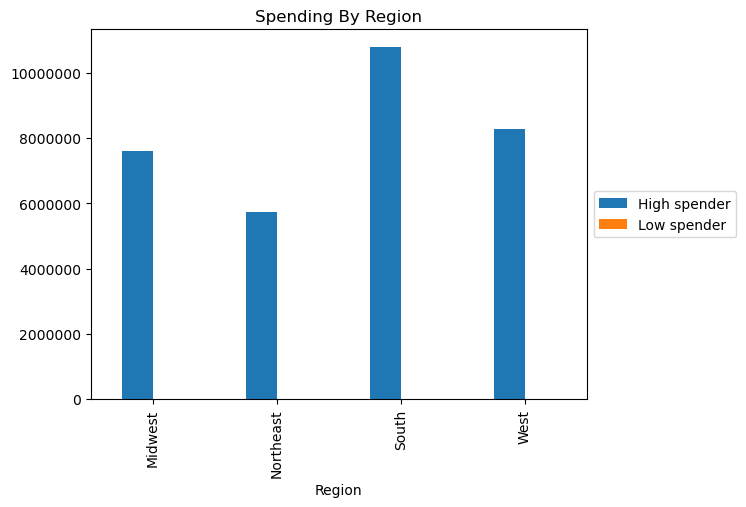

In [16]:
#Creating a barplot using Crosstab function 
bar = spending_region.plot.bar()
plt.title('Spending By Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

In [17]:
# Export the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_spending.png'))

In [18]:
#Exporting df_clean customer data
df_clean.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_clean.pkl'))